Single Tree:0.8148148148148148 Random Forest:0.9814814814814815


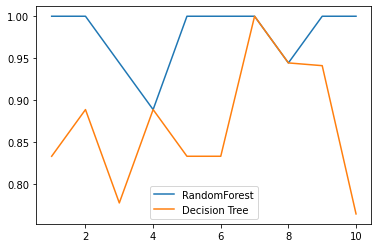

In [1]:

# 使用红酒数据集，验证10折交叉验证在随机森林和单个决策树效益的对比。
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

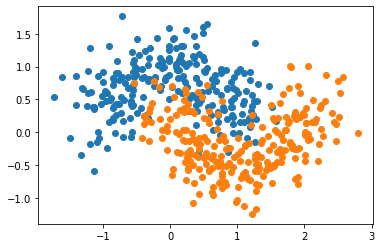

0.84

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# ==========================>>
# 手动实现集成学习(这里单个模型未调优，可以自己调到最优，进行jicheng)
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)


y_pre_log = log_clf.predict(X_test)
y_pre_svm = svm_clf.predict(X_test)
y_pre_dt = dt_clf.predict(X_test)

# 进行少数服从多数（投票）
# （>=2?）三个模型，当有2个或3个预测为1，就说其是1,否则就是0
y_pre = np.array((y_pre_log + y_pre_svm + y_pre_dt) >= 2, dtype='int')
y_pre

# 查看准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

# =============>>
# 使用voting进行集成

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())
], voting='hard')
voting_clf.fit(X_train, y_train)

voting_clf.score(X_test, y_test)